Yang Zhang  Ruoxuan Lin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

Question 1

In [2]:
start_time = time.time()
# import the file
states = pd.read_excel("us_states.xlsx")
data = pd.read_csv("us_tweets_sample.csv",low_memory=False)

# drop duplicate
print(f"Number of observations in the original dataset: {data.shape[0]}")
data.drop_duplicates(subset=['status_id'], inplace=True)
tweets_us_df = data.sample(n=500000, random_state=42)
# convert states to lowercase
tweets_us_df['location'] = tweets_us_df['location'].str.lower()
states['state'] = states['state'].str.lower()

tweets_us_df['state_count'] = tweets_us_df['location'].str.count('|'.join(states['state']))
tweets_us_df = tweets_us_df[tweets_us_df['state_count'] == 1]

# obervation after update
print(f"Number of observations after update: {tweets_us_df.shape[0]}")

# percentage of data lost
print(f"percentage of the data lost: {(500000-tweets_us_df.shape[0])/500000}")

# print time
elapsed_time = time.time() - start_time
print(f"Elapsed Time: {elapsed_time}second")

Number of observations in the original dataset: 2000000
Number of observations after update: 497033
percentage of the data lost: 0.005934
Elapsed Time: 32.55403971672058second


Question 2                                           

In [3]:
# Start the timer
start_time = time.time()

# Extract day from the created_at column
tweets_us_df['day'] = pd.to_datetime(tweets_us_df['created_at']).dt.strftime('%Y-%m-%d')


# Merge the region information from us_states_df to tweets_us_df
tweets_us_df = pd.merge(tweets_us_df, states, left_on='state', right_on='state', how='left')

# print time
elapsed_time = time.time() - start_time
print(f"Elapsed Time: {elapsed_time}")

# Display the first few rows to verify
tweets_us_df.head()


Elapsed Time: 1.0814049243927002


,Unnamed: 0,index,user_id,status_id,created_at,screen_name,text,reply_to_screen_name,is_quote,is_retweet,...,account_created_at,state,clean_text,cleaned_and_lemmatized_text,tweet_index,state_population,state_population_inv_weight,state_count,day,region
0,1828401,680960,x1167830992465420290,x1253850611365355520,2020-04-25 00:57:35,60blue_bird,@DMKANDOIT @toolewlew @DefenseBaron @djrothkop...,DMKANDOIT,False,False,...,2019-08-31 16:06:40,maryland,dmkandoit toolewlew defensebaron djrothkopf re...,dmkandoit toolewlew defensebaron djrothkopf re...,TW680960,6045680,54.293235,1,2020-04-25,Northeast
1,1200071,877896,x25320639,x1255458531458920450,2020-04-29 11:26:53,jerome_corsi,Dr. Corsi 04-28-20: DOJ after me again (still)...,NaN,False,False,...,2009-03-19 15:41:07,washington,corsi doj firebarr firewray allow mueller pros...,corsi doj firebarr firewray allow mueller pros...,TW877896,7614893,43.104942,1,2020-04-29,West
2,194849,2648951,x17448943,x1266502478696251392,2020-05-29 22:51:36,RitaRubin,What happens when a patient w/ #COVID19 underg...,NaN,False,True,...,2008-11-17 20:09:07,washington,happens patient covid undergoes surgery new re...,happens patient covid undergoes surgery new re...,TW2648951,7614893,43.104942,1,2020-05-29,West
3,1629054,5655268,x289424875,x1308455529895862274,2020-09-22 17:18:02,jeffgates01,“No amount of money will make up for the marke...,NaN,False,True,...,2011-04-28 16:38:15,kansas,amount money make markets lost billion new rel...,amount money make market lose billion new reli...,TW5655268,2913314,112.668776,1,2020-09-22,Midwest
4,191144,5594975,x3320366514,x1307373577327575042,2020-09-19 17:38:45,BullsErnest,We know the pandemic is out of control.\nWe kn...,NaN,False,True,...,2015-08-19 17:06:16,south dakota,know pandemic control know kids get sick die d...,know pandemic control know kid get sick die de...,TW5594975,884659,371.035080,1,2020-09-19,Midwest


Question 3

In [4]:
import string
import re
import nltk
from nltk.corpus import stopwords
# stop words indicate words that are so widely used that they carry very little useful information.
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define a function to clean the tweet
def tweet_cleaner(tweet):
    # Convert the tweet to lowercase
    #tweet = str(tweet)
    
    tweet = tweet.lower()
    
    # Remove words that start with b'
    tweet = re.sub(r"\b'\w+", '', tweet)
        
    # Remove all hashtags (words starting with '#')
    tweet = re.sub(r'#\w+', '', tweet, flags=re.IGNORECASE)
    
    # Remove punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stop words
    
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])
    
    # Delete all words that are 3 letters long or shorter
    tweet = ' '.join([word for word in tweet.split() if len(word) > 3])
    
    # Remove all links (words starting with 'http')
    tweet = re.sub(r'http\S*', '', tweet)
    
    # Remove all emojis (words containing '\\')
    tweet = re.sub(r'\\[^\s]+', '', tweet)
    
    return tweet


[nltk_data] Downloading package stopwords to C:\Users\Yang
[nltk_data]     Zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
tweets_us_df.head()

,Unnamed: 0,index,user_id,status_id,created_at,screen_name,text,reply_to_screen_name,is_quote,is_retweet,...,account_created_at,state,clean_text,cleaned_and_lemmatized_text,tweet_index,state_population,state_population_inv_weight,state_count,day,region
0,1828401,680960,x1167830992465420290,x1253850611365355520,2020-04-25 00:57:35,60blue_bird,@DMKANDOIT @toolewlew @DefenseBaron @djrothkop...,DMKANDOIT,False,False,...,2019-08-31 16:06:40,maryland,dmkandoit toolewlew defensebaron djrothkopf re...,dmkandoit toolewlew defensebaron djrothkopf re...,TW680960,6045680,54.293235,1,2020-04-25,Northeast
1,1200071,877896,x25320639,x1255458531458920450,2020-04-29 11:26:53,jerome_corsi,Dr. Corsi 04-28-20: DOJ after me again (still)...,NaN,False,False,...,2009-03-19 15:41:07,washington,corsi doj firebarr firewray allow mueller pros...,corsi doj firebarr firewray allow mueller pros...,TW877896,7614893,43.104942,1,2020-04-29,West
2,194849,2648951,x17448943,x1266502478696251392,2020-05-29 22:51:36,RitaRubin,What happens when a patient w/ #COVID19 underg...,NaN,False,True,...,2008-11-17 20:09:07,washington,happens patient covid undergoes surgery new re...,happens patient covid undergoes surgery new re...,TW2648951,7614893,43.104942,1,2020-05-29,West
3,1629054,5655268,x289424875,x1308455529895862274,2020-09-22 17:18:02,jeffgates01,“No amount of money will make up for the marke...,NaN,False,True,...,2011-04-28 16:38:15,kansas,amount money make markets lost billion new rel...,amount money make market lose billion new reli...,TW5655268,2913314,112.668776,1,2020-09-22,Midwest
4,191144,5594975,x3320366514,x1307373577327575042,2020-09-19 17:38:45,BullsErnest,We know the pandemic is out of control.\nWe kn...,NaN,False,True,...,2015-08-19 17:06:16,south dakota,know pandemic control know kids get sick die d...,know pandemic control know kid get sick die de...,TW5594975,884659,371.035080,1,2020-09-19,Midwest


In [6]:
!pip install --upgrade nltk


Question 4

In [7]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\Yang
[nltk_data]     Zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Yang Zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Yang
[nltk_data]     Zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Yang
[nltk_data]     Zhang\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
##Tags the words in the tweets
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return(wordnet.ADJ)
    elif nltk_tag.startswith('V'):
        return(wordnet.VERB)
    elif nltk_tag.startswith('N'):
        return(wordnet.NOUN)
    elif nltk_tag.startswith('R'):
        return(wordnet.ADV)
    else:          
        return(None)
    

In [9]:
##Lemmatizes the words in tweets and returns the cleaned and lemmatized tweet
def lemmatize_tweet(tweet):
    #tokenize the tweet and find the POS tag for each token
    tweet = tweet_cleaner(tweet)
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(tweet))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_tweet = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_tweet.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_tweet.append(lemmatizer.lemmatize(word, tag))
    return(" ".join(lemmatized_tweet))

In [10]:
start_time = time.time()

tweets_us_df['text_clean'] = tweets_us_df['text'].apply(lemmatize_tweet)
print(tweets_us_df.head())

elapsed_time = time.time() - start_time
print(f"Elapsed Time: {elapsed_time } ")

   Unnamed: 0    index               user_id             status_id  \
0     1828401   680960  x1167830992465420290  x1253850611365355520   
1     1200071   877896             x25320639  x1255458531458920450   
2      194849  2648951             x17448943  x1266502478696251392   
3     1629054  5655268            x289424875  x1308455529895862274   
4      191144  5594975           x3320366514  x1307373577327575042   

            created_at   screen_name  \
0  2020-04-25 00:57:35   60blue_bird   
1  2020-04-29 11:26:53  jerome_corsi   
2  2020-05-29 22:51:36     RitaRubin   
3  2020-09-22 17:18:02   jeffgates01   
4  2020-09-19 17:38:45   BullsErnest   

                                                text reply_to_screen_name  \
0  @DMKANDOIT @toolewlew @DefenseBaron @djrothkop...            DMKANDOIT   
1  Dr. Corsi 04-28-20: DOJ after me again (still)...                  NaN   
2  What happens when a patient w/ #COVID19 underg...                  NaN   
3  “No amount of money will ma

In [11]:
#tweets_us_df.to_csv('tweets_us_df_4.csv', index=False) 

In [12]:
#tweets_us_df = pd.read_csv('tweets_us_df_4.csv')

Question 5

In [13]:
import math
from collections import Counter

In [14]:
WORD = re.compile(r"\w+")

In [15]:
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

In [16]:
def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

In [17]:
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    scaled_column = (column - min_val) / (max_val - min_val)
    return scaled_column

In [18]:
start_time = time.time()

# import dictionaries
isolation_df = pd.read_excel("isolation_words.xlsx")
disinfectants_df = pd.read_excel("disinfectant_words.xlsx")
vaccine_df = pd.read_excel("vaccine_words.xlsx")
medicine_df = pd.read_excel("medicine_words.xlsx")

# comvert to lowercase
isolation_df['words'] = isolation_df['words'].str.lower()
disinfectants_df['words'] = disinfectants_df['words'].str.lower()
vaccine_df['words'] = vaccine_df['words'].str.lower()
medicine_df['words'] = medicine_df['words'].str.lower()

disinfectants_df = disinfectants_df.drop_duplicates(subset='words', keep='first')
# tag and lemmatize the words
isolation_df['words'] = isolation_df['words'].apply(lemmatize_tweet)
disinfectants_df['words'] = disinfectants_df['words'].apply(lemmatize_tweet)
vaccine_df['words'] = vaccine_df['words'].apply(lemmatize_tweet)
medicine_df['words'] = medicine_df['words'].apply(lemmatize_tweet)

from joblib import Parallel, delayed

# Assume text_to_vector and get_cosine are defined, as well as tweets_us_df and isolation_df

def compute_cosine_scores(index, row, isolation_df):
    clean_tweet = str(row['text_clean'])
    
    cosine_score = get_cosine(text_to_vector(clean_tweet), text_to_vector(" ".join(isolation_df['words'])))

    return cosine_score

# Use joblib to parallelize the computation
cosine_scores_iso = Parallel(n_jobs=-1)(delayed(compute_cosine_scores)(index, row, isolation_df) for index, row in tweets_us_df.iterrows())
cosine_scores_dis = Parallel(n_jobs=-1)(delayed(compute_cosine_scores)(index, row, disinfectants_df) for index, row in tweets_us_df.iterrows())
cosine_scores_vac = Parallel(n_jobs=-1)(delayed(compute_cosine_scores)(index, row, vaccine_df) for index, row in tweets_us_df.iterrows())
cosine_scores_med = Parallel(n_jobs=-1)(delayed(compute_cosine_scores)(index, row, medicine_df) for index, row in tweets_us_df.iterrows())

# Convert the list of cosine scores to a DataFrame
tweets_us_df['isolation_cosine'] = pd.DataFrame(cosine_scores_iso, columns=['isolation_cosine'])
tweets_us_df['disinfectants_cosine'] = pd.DataFrame(cosine_scores_dis, columns=['disinfectants_cosine'])
tweets_us_df['vaccine_cosine'] = pd.DataFrame(cosine_scores_vac, columns=['vaccine_cosine'])
tweets_us_df['medicine_cosine'] = pd.DataFrame(cosine_scores_med, columns=['medicine_cosine'])

# normalization
tweets_us_df['isolation_cosine_normal'] = min_max_scaling(tweets_us_df['isolation_cosine'])
tweets_us_df['disinfectants_cosine_normal'] = min_max_scaling(tweets_us_df['disinfectants_cosine'])
tweets_us_df['vaccine_cosine_normal'] = min_max_scaling(tweets_us_df['vaccine_cosine'])
tweets_us_df['medicine_cosine_normal'] = min_max_scaling(tweets_us_df['medicine_cosine'])

elapsed_time = time.time() - start_time
print(f"Elapsed Time: {elapsed_time} second")


Elapsed Time: 218.5025794506073 second


In [19]:
tweets_us_df.head()

,Unnamed: 0,index,user_id,status_id,created_at,screen_name,text,reply_to_screen_name,is_quote,is_retweet,...,region,text_clean,isolation_cosine,disinfectants_cosine,vaccine_cosine,medicine_cosine,isolation_cosine_normal,disinfectants_cosine_normal,vaccine_cosine_normal,medicine_cosine_normal
0,1828401,680960,x1167830992465420290,x1253850611365355520,2020-04-25 00:57:35,60blue_bird,@DMKANDOIT @toolewlew @DefenseBaron @djrothkop...,DMKANDOIT,False,False,...,Northeast,dmkandoit toolewlew defensebaron djrothkopf re...,0.0,0.000000,0.0,0.005747,0.0,0.000000,0.0,0.014804
1,1200071,877896,x25320639,x1255458531458920450,2020-04-29 11:26:53,jerome_corsi,Dr. Corsi 04-28-20: DOJ after me again (still)...,NaN,False,False,...,West,corsi 042820 still allow mueller prosecutor ru...,0.0,0.001567,0.0,0.003318,0.0,0.002924,0.0,0.008547
2,194849,2648951,x17448943,x1266502478696251392,2020-05-29 22:51:36,RitaRubin,What happens when a patient w/ #COVID19 underg...,NaN,False,True,...,West,happens patient undergoes surgery report 1100 ...,0.0,0.001567,0.0,0.019909,0.0,0.002924,0.0,0.051282
3,1629054,5655268,x289424875,x1308455529895862274,2020-09-22 17:18:02,jeffgates01,“No amount of money will make up for the marke...,NaN,False,True,...,Midwest,amount money make market lose ” billion relief...,0.0,0.000000,0.0,0.009004,0.0,0.000000,0.0,0.023193
4,191144,5594975,x3320366514,x1307373577327575042,2020-09-19 17:38:45,BullsErnest,We know the pandemic is out of control.\nWe kn...,NaN,False,True,...,Midwest,know pandemic control know kid sick death nati...,0.0,0.002559,0.0,0.000000,0.0,0.004775,0.0,0.000000


In [20]:
#tweets_us_df.to_csv('tweets_us_df_5.csv', index=False) 

Question 6

In [21]:
start_time = time.time()

tweets_us_df = tweets_us_df[tweets_us_df['state'].isin(states['state'])]

state_topic_score_data = tweets_us_df.groupby('state').agg({
    'isolation_cosine_normal': 'mean',
    'disinfectants_cosine_normal': 'mean',
    'vaccine_cosine_normal': 'mean',
    'medicine_cosine_normal': 'mean'
}).reset_index()

# Rename the columns to add "average" prefix
state_topic_score_data.columns = ['state', 'average isolation_cosine_normal',
                                  'average disinfectants_cosine_normal', 
                                  'average vaccine_cosine_normal', 
                                  'average medicine_cosine_normal']

# Display the resulting DataFrame
state_topic_score_data

,state,average isolation_cosine_normal,average disinfectants_cosine_normal,average vaccine_cosine_normal,average medicine_cosine_normal
0,alabama,0.004404,0.003460,0.016002,0.012137
1,alaska,0.003722,0.003099,0.015340,0.011165
2,arizona,0.003807,0.003349,0.014831,0.011509
3,arkansas,0.005039,0.003372,0.013763,0.011419
4,california,0.003666,0.003525,0.014480,0.011323
5,colorado,0.003778,0.003412,0.016043,0.012144
6,connecticut,0.003873,0.003334,0.018106,0.012680
7,delaware,0.003435,0.003877,0.015064,0.010830
8,florida,0.003773,0.003277,0.013988,0.011211
9,georgia,0.003482,0.003465,0.015373,0.012156


In [22]:
state_topic_score_data.to_csv('state_topic_score_data.csv', index=False)

In [23]:
region_topic_score_data = tweets_us_df.groupby('region').agg({
    'isolation_cosine_normal': 'mean',
    'disinfectants_cosine_normal': 'mean',
    'vaccine_cosine_normal': 'mean',
    'medicine_cosine_normal': 'mean'
}).reset_index()

# Rename the columns to add "average" prefix
region_topic_score_data.columns = ['region', 'average isolation_cosine_normal', 
                                   'average disinfectants_cosine_normal', 
                                   'average vaccine_cosine_normal', 
                                   'average medicine_cosine_normal']

# Display the resulting DataFrame
region_topic_score_data


,region,average isolation_cosine_normal,average disinfectants_cosine_normal,average vaccine_cosine_normal,average medicine_cosine_normal
0,Midwest,0.003931,0.003468,0.015097,0.011914
1,Northeast,0.003956,0.003504,0.015524,0.011762
2,South,0.003879,0.003421,0.015208,0.011827
3,West,0.003880,0.003359,0.015805,0.011784


In [24]:
region_topic_score_data.to_csv('region_topic_score_data.csv', index=False)

In [25]:
elapsed_time = time.time() - start_time
print(f"Elapsed Time: {elapsed_time}second")

Elapsed Time: 0.3725624084472656second


Question 7

In [26]:
from sklearn.cluster import KMeans, SpectralClustering

In [27]:
state_topic_data = pd.read_csv("state_topic_score_data.csv")

In [28]:
X = state_topic_data[['average isolation_cosine_normal', 
                      'average disinfectants_cosine_normal', 
                      'average vaccine_cosine_normal', 
                      'average medicine_cosine_normal']]


# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
state_topic_data['KMeans_Cluster'] = kmeans.fit_predict(X)

# Spectral clustering
spectral = SpectralClustering(n_clusters=4, random_state=0)
state_topic_data['Spectral_Cluster'] = spectral.fit_predict(X)
state_topic_data = pd.merge(state_topic_data, states, left_on='state', right_on='state', how='left')


state_topic_data

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,state,average isolation_cosine_normal,average disinfectants_cosine_normal,average vaccine_cosine_normal,average medicine_cosine_normal,KMeans_Cluster,Spectral_Cluster,region
0,alabama,0.004404,0.003460,0.016002,0.012137,3,0,South
1,alaska,0.003722,0.003099,0.015340,0.011165,2,3,West
2,arizona,0.003807,0.003349,0.014831,0.011509,2,3,West
3,arkansas,0.005039,0.003372,0.013763,0.011419,1,2,South
4,california,0.003666,0.003525,0.014480,0.011323,2,3,West
5,colorado,0.003778,0.003412,0.016043,0.012144,3,1,West
6,connecticut,0.003873,0.003334,0.018106,0.012680,0,0,Northeast
7,delaware,0.003435,0.003877,0.015064,0.010830,2,3,South
8,florida,0.003773,0.003277,0.013988,0.011211,1,3,South
9,georgia,0.003482,0.003465,0.015373,0.012156,3,1,South


Question 8

In [29]:
from sklearn.metrics import calinski_harabasz_score

In [30]:
range_n_clusters = list(range(2, 21))

# Initialize lists to store the scores for each method
ch_scores_kmeans = []
ch_scores_spectral = []

for n_clusters in range_n_clusters:
    # Run KMeans and calculate CH score
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    labels_kmeans = kmeans.labels_
    ch_score_kmeans = calinski_harabasz_score(X, labels_kmeans)
    ch_scores_kmeans.append((n_clusters, ch_score_kmeans))

    # Run Spectral Clustering and calculate CH score
    spectral = SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors').fit(X)
    labels_spectral = spectral.labels_
    ch_score_spectral = calinski_harabasz_score(X, labels_spectral)
    ch_scores_spectral.append((n_clusters, ch_score_spectral))

# Convert scores to DataFrame for easier analysis
df_ch_scores_kmeans = pd.DataFrame(ch_scores_kmeans, columns=['n_clusters', 'ch_score_kmeans'])
df_ch_scores_spectral = pd.DataFrame(ch_scores_spectral, columns=['n_clusters', 'ch_score_spectral'])

df_ch_scores_kmeans, df_ch_scores_spectral

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads

(    n_clusters  ch_score_kmeans
 0            2        41.393903
 1            3        35.246558
 2            4        34.469365
 3            5        30.951085
 4            6        29.957199
 5            7        29.270171
 6            8        29.370114
 7            9        28.830138
 8           10        29.763534
 9           11        28.187685
 10          12        28.186343
 11          13        29.679442
 12          14        28.881358
 13          15        29.048618
 14          16        29.165299
 15          17        29.784170
 16          18        29.977958
 17          19        31.723473
 18          20        29.546962,
     n_clusters  ch_score_spectral
 0            2          41.393903
 1            3          33.807565
 2            4          27.890619
 3            5          24.935325
 4            6          22.060940
 5            7          21.574215
 6            8          21.994221
 7            9          19.847469
 8           10         

Question9

In [31]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

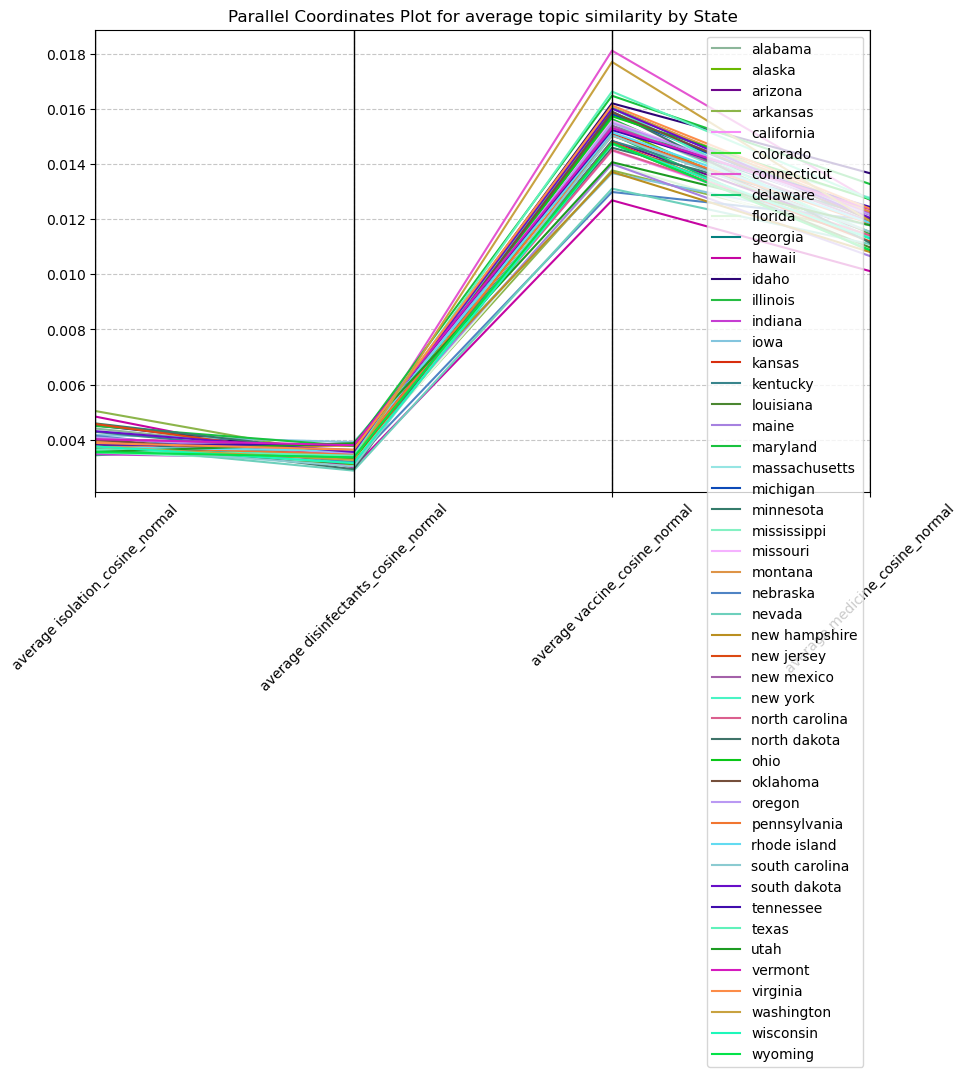

In [32]:
# Create the parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(state_topic_data[['state', 'average isolation_cosine_normal', 'average disinfectants_cosine_normal', 
                         'average vaccine_cosine_normal', 'average medicine_cosine_normal']], 'state')

# Show the plot
plt.title("Parallel Coordinates Plot for average topic similarity by State")
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

Question 10

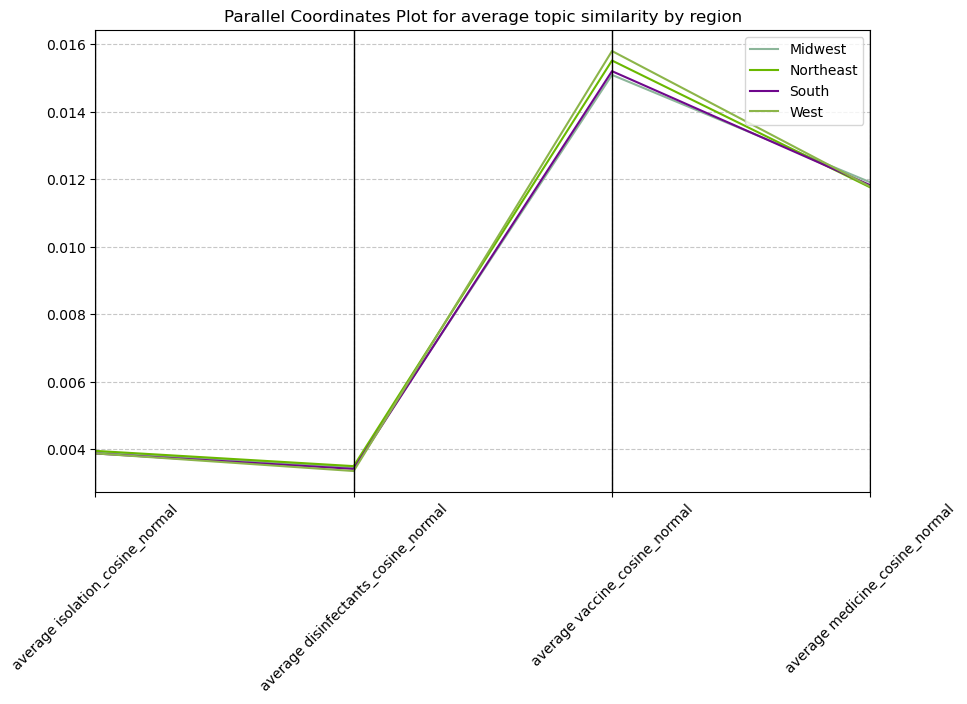

In [33]:
# Create the parallel coordinates plot
plt.figure(figsize=(10, 6))
parallel_coordinates(region_topic_score_data[['region', 'average isolation_cosine_normal', 'average disinfectants_cosine_normal', 
                         'average vaccine_cosine_normal', 'average medicine_cosine_normal']], 'region')

# Show the plot
plt.title("Parallel Coordinates Plot for average topic similarity by region")
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

question 11

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


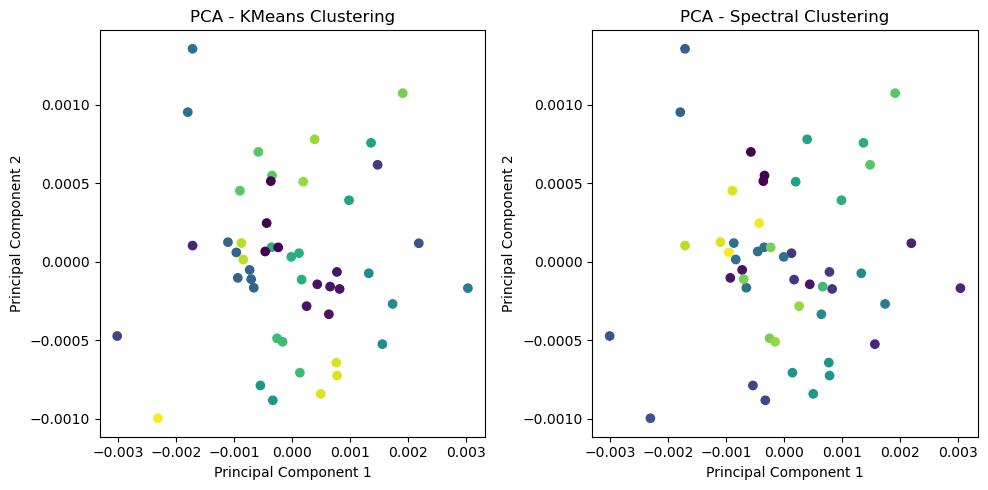

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X is the DataFrame with the four features we used for clustering
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Now,  kmeans_labels and spectral_labels contain the cluster labels from Q7
kmeans_labels = kmeans.fit_predict(X)
spectral_labels = spectral.fit_predict(X)

# Creating a scatter plot for k-means clustering results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('PCA - KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Creating a scatter plot for spectral clustering results
plt.subplot(1, 2, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=spectral_labels, cmap='viridis', marker='o')
plt.title('PCA - Spectral Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()
